![title](kgtitanic.png)

# TITANIC  TEAM  KGT

Team Kevin, Thomas and Captain

Base on data of death in the Titanic, here is a model to find the death in a test file based on train data.

## STEP IMPORTS

Load Pandas for data manipulation and matplotlib for later to do some plots

In [2]:
#  A few to start
import pandas as pd
import matplotlib.pyplot as plt

## LOAD DATA

In [3]:
test = pd.read_csv("./DATA/test.csv")
train = pd.read_csv("./DATA/train.csv")

## TAKE FIRST LOOK

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now we know the heads and the count. 
First thing to notice is that Age has missing data

## Analyze and Fix Data

### FILL MISSING AGE

Let's use numpy for arrays and add import to generate random numbers too

In [ ]:
import numpy as np
import random
std_Age  = train["Age"].std()
mean_Age = train["Age"].mean()
age_list = np.random.randint(mean_Age-std_Age,mean_Age + std_Age)
train["Age"][np.isnan(train["Age"])] = age_list


### PLOT AGE

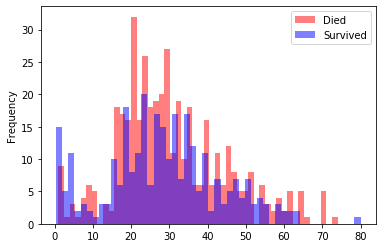

In [5]:
tit_died = train[train["Survived"] == 0]
tit_survived = train[train["Survived"] == 1]

tit_died["Age"].plot.hist(alpha=0.5,color='yellow',bins=50)
tit_survived["Age"].plot.hist(alpha=0.5,color='blue',bins=50)

plt.legend(['Died','Survived'])
plt.show()

Checking if the age affected the results.  Kids and Old survived most

### CHECK PASSANGER CLASSES

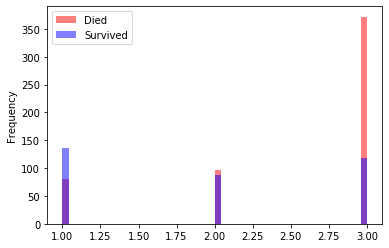

In [6]:
tit_died["Pclass"].plot.hist(alpha=0.5,color='red',bins=50)
tit_survived["Pclass"].plot.hist(alpha=0.5,color='blue',bins=50)

plt.legend(['Died','Survived'])
plt.show()

This can tell that first and middle classes had big chances of surviving and most of third class died

### CHECK SEX

In [9]:
print (train["Sex"])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


But first we need to make sex a numeric value  1 to male  and 2 to female

In [11]:
genders = {"male": 0, "female": 1}
data = [train]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [15]:
print (train["Sex"])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


Now plot

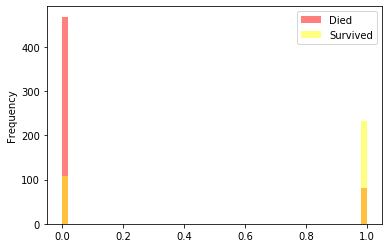

In [18]:
tit_died = train[train["Survived"] == 0]
tit_survived = train[train["Survived"] == 1]

tit_died["Sex"].plot.hist(alpha=0.5,color='red',bins=50)
tit_survived["Sex"].plot.hist(alpha=0.5,color='yellow',bins=50)

plt.legend(['Died','Survived'])
plt.show()

Most female survived in their group

## CONCLUSION AND SETUP

### CONCLUSION

The most significant details about this data for us was the Age, the Class were the passangers traveled and the Sex of the passangers.  It looks like if you were young or a woman and in first class.  You would have the most chances of surviving in the Titanic.  Which it makes sense when it comes in an emergency like this.  There are other information in the data, but the most revelant seems to be these three.

### SETUP TEST

#### Create dummies

In [23]:
#Function

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

# Loop

for column in ["Pclass","Sex","Age"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)
    


#### Import Logistic Regression from sklearn for algorithm and setup

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
KGT_columns = ['Pclass', 'Sex', 'Age']
lr.fit(train[KGT_columns], train['Survived'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Model and prediction.  train_test_split to split data in two subsets and get both train and test

In [ ]:
from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

print(predictions)
print(lr)

#### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

print(accuracy)


0.8044692737430168

## Submission

In [ ]:
holdout_predictions = lr.predict(holdout[columns])

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("./test33.csv",index=False)

SCORE  = 0.76076

...